In [16]:
import cobra

In [ ]:
import numpy

In [19]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(8, 4)})

# 0. user-defined variables

In [2]:
model_file = '/Users/adrian/projects/riia/data/model/Recon3DModel_301.mat'

In [3]:
cobra_config = cobra.Configuration()
cobra_config.processes = 8
cobra.Configuration()

Attribute,Description,Value
solver,Mathematical optimization solver,glpk
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,8
cache_directory,Path for the model cache,/Users/adrian/Library/Caches/cobrapy
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


# 1. load model

In [4]:
%%time
model = cobra.io.load_matlab_model(model_file)

CPU times: user 2min 49s, sys: 575 ms, total: 2min 50s
Wall time: 2min 51s


In [5]:
model

Name,Recon3DModel
Memory address,0x07f85018fab80
Number of metabolites,5835
Number of reactions,10600
Number of groups,0
Objective expression,1.0*biomass_maintenance - 1.0*biomass_maintenance_reverse_95d2f
Compartments,"c, l, m, r, e, x, n, g, i"


In [6]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
12ppd_R[e],EX_12ppd_R[e],250.8,3,0.26%
5aop[e],EX_5aop[e],1000,5,1.71%
HC00250[e],EX_HC00250[e],1000,0,0.00%
HC00900[e],EX_HC00900[e],1000,4,1.37%
HC01361[e],EX_HC01361[e],1000,9,3.08%
Lkynr[e],EX_Lkynr[e],105.1,10,0.36%
acetone[e],EX_acetone[e],427.7,3,0.44%
alltn[e],EX_alltn[e],1000,4,1.37%
atp[e],EX_atp[e],1000,10,3.42%
cbasp[e],EX_cbasp[e],266.2,5,0.46%


# 2. FBA

In [7]:
%%time
solution = model.optimize()
print(solution.status)
model.summary()

optimal
CPU times: user 1.71 s, sys: 10.7 ms, total: 1.72 s
Wall time: 1.72 s


Metabolite,Reaction,Flux,C-Number,C-Flux
12ppd_R[e],EX_12ppd_R[e],250.8,3,0.26%
5aop[e],EX_5aop[e],1000,5,1.71%
HC00250[e],EX_HC00250[e],1000,0,0.00%
HC00900[e],EX_HC00900[e],1000,4,1.37%
HC01361[e],EX_HC01361[e],1000,9,3.08%
Lkynr[e],EX_Lkynr[e],105.1,10,0.36%
acetone[e],EX_acetone[e],427.7,3,0.44%
alltn[e],EX_alltn[e],1000,4,1.37%
atp[e],EX_atp[e],1000,10,3.42%
cit[e],EX_cit[e],718.8,6,1.48%


In [8]:
# 3. plot histogram of fluxes within their boundaries

In [23]:
ratios = []
for reaction in model.reactions:
    
    observed_flux = numpy.abs(reaction.flux)
    max_flux_allowed = numpy.max([numpy.abs(reaction.lower_bound), numpy.abs(reaction.upper_bound)])
    saturation_ratio = observed_flux / max_flux_allowed
    ratios.append(saturation_ratio)
    
    if saturation_ratio > 2/3:
        print(reaction.id)
        print(reaction.name)
        print(reaction.lower_bound, reaction.upper_bound, reaction.flux)
        print(observed_flux, max_flux_allowed, saturation_ratio)
        print()


4MOPt2im
4-Methyl-2-Oxopentanoate Mitochondrial Transport via Proton Symport
0.0 1000.0 773.8789951651198
773.8789951651198 1000.0 0.7738789951651198

5AOPtm
5-Aminolevulinate Mitochondrial Transport
-1000.0 1000.0 1000.0
1000.0 1000.0 1.0

ACt2m
Acetate Mitochondrial Transport via Proton Symport
-1000.0 1000.0 -884.4694079564375
884.4694079564375 1000.0 0.8844694079564375

ACTLMO
Acetol Monooxygenase
0.0 1000.0 779.5702338341739
779.5702338341739 1000.0 0.7795702338341739

AMPDA
Adenosine Monophosphate Deaminase
0.0 1000.0 1000.0
1000.0 1000.0 1.0

ASAH1
N-Acylsphingosine Amidohydrolase
0.0 1000.0 1000.0
1000.0 1000.0 1.0

ATPtm
ADP/ATP Transporter, Mitochondrial
0.0 1000.0 1000.0
1000.0 1000.0 1.0

CBPPer
Carbamoyl Phosphate Phosphotransferase, Endoplasmic Reticulum
0.0 1000.0 1000.0
1000.0 1000.0 1.0

CBPter
Carbamoyl Phosphate Transport, Endoplasmic Reticulum
-1000.0 1000.0 1000.0
1000.0 1000.0 1.0

CITtbm
Citrate Transport, Mitochondrial
-1000.0 1000.0 1000.0
1000.0 1000.0 1.0

CO

RE0124C
Diamine N-Acetyltransferase
-1000.0 1000.0 -1000.0
1000.0 1000.0 1.0

RE0456N
Ribonucleoside-Diphosphate Reductase
-1000.0 1000.0 1000.0
1000.0 1000.0 1.0

RE1530C
Thymidine Kinase
-1000.0 1000.0 -1000.0
1000.0 1000.0 1.0

RE1918C
RE1918C
-1000.0 1000.0 1000.0
1000.0 1000.0 1.0

RE2112C
RE2112C
0.0 1000.0 853.0214708612418
853.0214708612418 1000.0 0.8530214708612418

RE2426C
RE2426C
-1000.0 1000.0 -1000.0
1000.0 1000.0 1.0

RE2640C
N-Acyl-Aliphatic-L-Amino Acid Amidohydrolase
-1000.0 1000.0 -884.4694079564375
884.4694079564375 1000.0 0.8844694079564375

RE2677N
N-Acylsphingosine Galactosyltransferase
0.0 1000.0 1000.0000000000085
1000.0000000000085 1000.0 1.0000000000000084

RE3273C
Phospholipase D
-1000.0 1000.0 -786.572351745459
786.572351745459 1000.0 0.7865723517454589

RE3301C
Phospholipase D
0.0 1000.0 786.572351745459
786.572351745459 1000.0 0.7865723517454589

RE3352C
RE3352C
-1000.0 1000.0 -1000.0
1000.0 1000.0 1.0

EX_crm_hs[e]
Exchange of N-Acylsphingosine 
-1000.0 1

sink_met_L[c]
Sink_met_L[c]
-1000.0 1000.0 -1000.0
1000.0 1000.0 1.0

ATPS4mi
ATP synthase (four protons for one ATP)
0.0 1000.0 1000.0
1000.0 1000.0 1.0



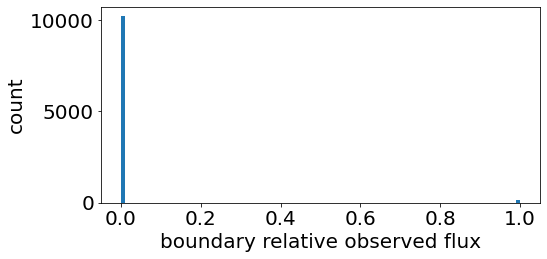

In [24]:
matplotlib.pyplot.hist(ratios, bins=100)
matplotlib.pyplot.xlabel('boundary relative observed flux')
matplotlib.pyplot.ylabel('count')
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()